In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('Placement.csv')

In [3]:
df.head(10)

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0
5,6,7.1,48,1
6,7,5.7,143,0
7,8,5.0,63,0
8,9,6.1,156,0
9,10,5.1,66,0


In [5]:
df.shape

(100, 4)

In [7]:
df.isnull().sum()

Student_ID    0
CGPA          0
IQ            0
Placement     0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\AJANTHA\AppData\Local\Temp\ipykernel_13880\359519271.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'])
C:\Users\AJANTHA\AppData\Local\Temp\ipykernel_13880\359519271.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['IQ'])


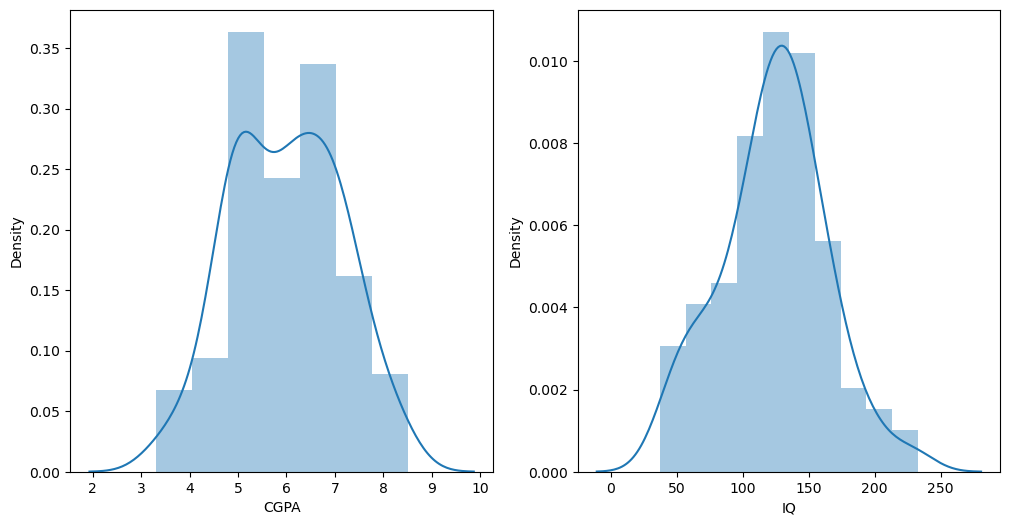

In [17]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'])
plt.subplot(1,2,2)
sns.distplot(df['IQ'])
plt.show()

In [15]:
df['IQ'].skew()

0.018095580898964243

In [19]:
# bounda
print('hei allow = ', df['CGPA'].mean()+3*df['CGPA'].std())
print('low allow = ', df['CGPA'].mean()-3*df['CGPA'].std())

hei allow =  9.421901021332708
low allow =  2.560098978667293


In [21]:
df[(df['CGPA']>9.42)|(df['CGPA']<2.56)]

,Student_ID,CGPA,IQ,Placement


In [23]:
df[(df['CGPA']>9.42)&(df['CGPA']<2.56)]

,Student_ID,CGPA,IQ,Placement


In [ ]:
# trim
# df1 = df[(df['CGPA']>9.42)&(df['CGPA']<2.56)]
# df1 # without outlier

In [25]:
# skewd
df['IQ'].describe()

count    100.000000
mean     123.580000
std       39.944198
min       37.000000
25%      101.500000
50%      127.500000
75%      149.000000
max      233.000000
Name: IQ, dtype: float64

<Axes: ylabel='IQ'>

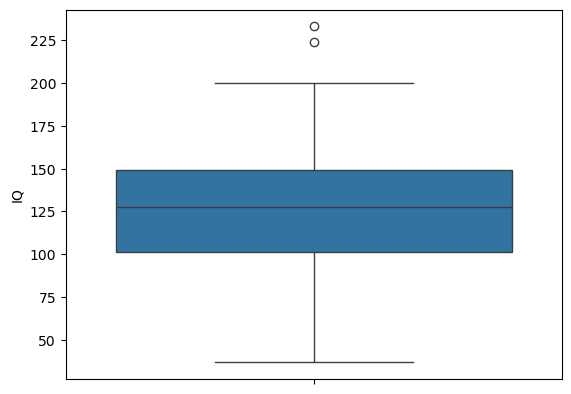

In [27]:
sns.boxplot(df['IQ'])

In [29]:
# find IQR
Q1 = df['IQ'].quantile(0.25)
Q3 = df['IQ'].quantile(0.75)
print(Q1)
print(Q3)

101.5
149.0


In [31]:
IQR = Q3-Q1
IQR

47.5

In [33]:
hig_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR
print(hig_lim)
print(low_lim)

220.25
30.25


In [35]:
# find outlier
df[df['IQ']>hig_lim]

,Student_ID,CGPA,IQ,Placement
16,17,5.2,224,0
50,51,3.5,233,0


In [37]:
df[df['IQ']<low_lim]

,Student_ID,CGPA,IQ,Placement


In [45]:
df1 = df[df['IQ']<hig_lim]
df1.shape

(98, 4)

C:\Users\AJANTHA\AppData\Local\Temp\ipykernel_13880\1119741874.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['IQ'])
C:\Users\AJANTHA\AppData\Local\Temp\ipykernel_13880\1119741874.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['IQ'])


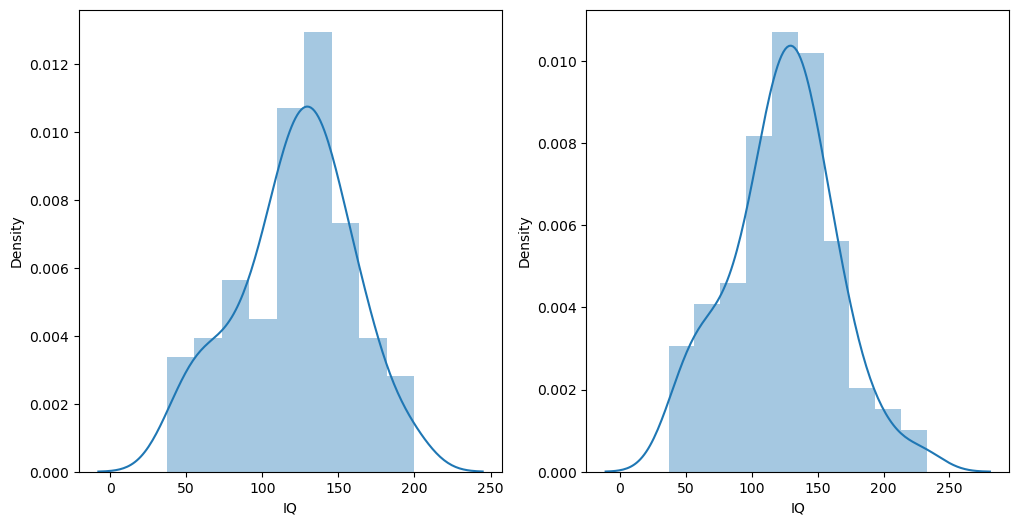

In [47]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(df1['IQ'])
plt.subplot(1,2,2)
sns.distplot(df['IQ'])
plt.show()

In [49]:
# capping
new_df = df.copy()
new_df.head()

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0


In [51]:
new_df['IQ']=np.where(new_df['IQ']>hig_lim, hig_lim,
                     np.where(new_df['IQ']<low_lim,low_lim,new_df['IQ']) )
new_df['IQ'].shape

(100,)

In [53]:
# Percentile
df2 = pd.read_csv('weight-height.csv')
df2.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971111
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [55]:
df2.shape

(10000, 3)

C:\Users\AJANTHA\AppData\Local\Temp\ipykernel_13880\2667532568.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Height'])


<Axes: xlabel='Height', ylabel='Density'>

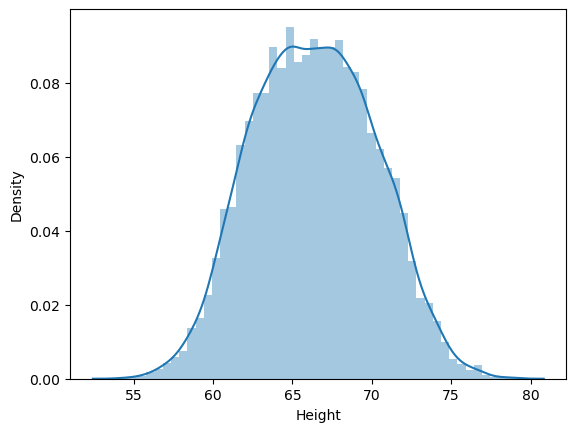

In [57]:
sns.distplot(df2['Height'])

<Axes: ylabel='Height'>

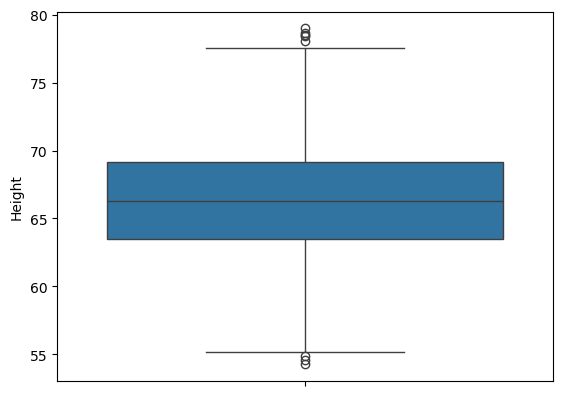

In [59]:
sns.boxplot(df2['Height'])

In [61]:
upper_lim = df2['Height'].quantile(0.99)
low_lim = df2['Height'].quantile(0.01)
print(upper_lim)
print(low_lim)

74.7857900592
58.134411587100004


In [69]:
df2[(df2['Height']>74.78)&(df2['Height']<58.13)]

,Gender,Height,Weight


In [71]:
df2['Height']=np.where(df2['Height']>upper_lim, upper_lim,
                     np.where(df2['Height']<low_lim,low_lim,df2['Height']) )
df2['Height'].shape

(10000,)